In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
cpu=pd.read_csv('../results/cpu/work_time.csv')
memory=pd.read_csv('../results/memory/work_memory.csv')

# CPU

In [7]:
cpu = cpu.iloc[: , 1:]

In [8]:
cpu=cpu.melt()
cpu.rename(columns = {"variable": "Callers","value":"CPU Time"}, 
          inplace = True)

In [9]:
cpu

,Callers,CPU Time
0,arcasHLA,279.18
1,arcasHLA,167.47
2,arcasHLA,401.41
3,arcasHLA,94.42
4,arcasHLA,690.39
5,arcasHLA,166.93
6,arcasHLA,224.68
7,arcasHLA,269.69
8,arcasHLA,201.60
9,arcasHLA,303.81


# Memory

In [10]:
memory
memory = memory.iloc[: , 1:]
memory=memory.melt()
memory.rename(columns = {"variable": "Callers","value":"Memory"}, 
          inplace = True)

In [11]:
memory['Memory']=memory['Memory'].div(10**3)

In [12]:
df=pd.merge(cpu,memory)

In [13]:
df=df.melt(id_vars=["Callers"])
df.rename(columns = {"variable": "Metric"}, 
          inplace = True)

# Plots

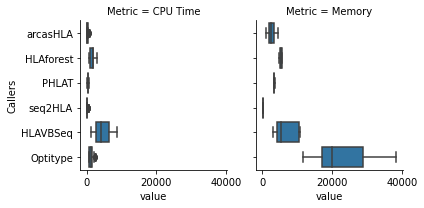

In [14]:
g = sns.FacetGrid(df, col="Metric")
g.map_dataframe(sns.boxplot, x="value", y="Callers")

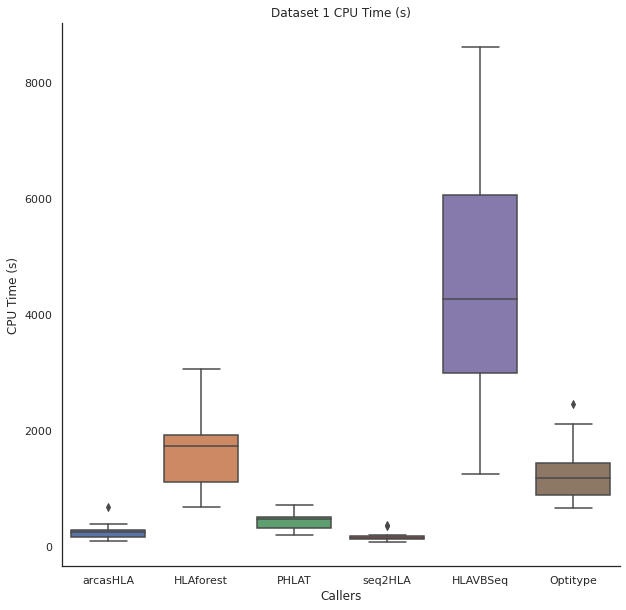

In [16]:
sns.set_context("paper")
sns.color_palette("pastel")
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("white")
ax = sns.boxplot(x="Callers",y="CPU Time", data=cpu)
ax.set_ylabel("CPU Time (s)")
ax.set_xlabel("Callers")
ax.set_title("Dataset 1 CPU Time (s)") 
sns.despine()
plt.savefig('../Figures/d1_cpu.png',bbox_inches ="tight",dpi=300)

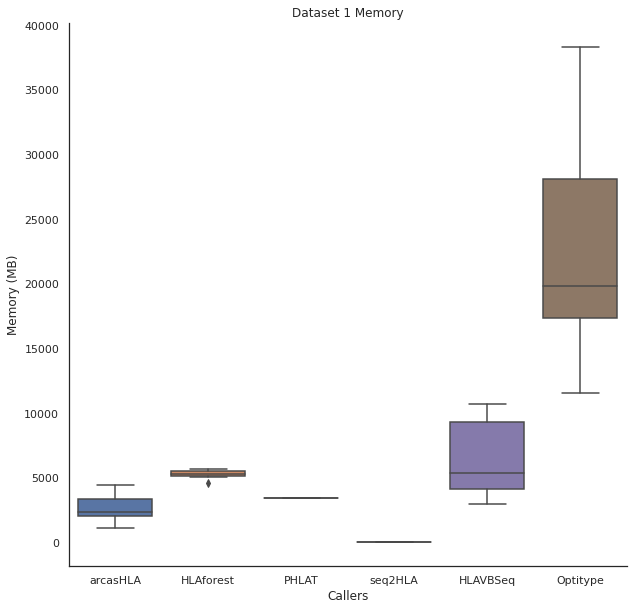

In [17]:
sns.set_context("paper")
sns.color_palette("pastel")
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("white")
ax = sns.boxplot(x="Callers",y="Memory", data=memory)
ax.set_ylabel("Memory (MB)")
ax.set_xlabel("Callers")
ax.set_title("Dataset 1 Memory") 
sns.despine()
plt.savefig('../Figures/d1_memory.png',bbox_inches ="tight",dpi=300)